In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
sns.set_style("whitegrid")
sns.set_context('paper', rc={"font.size":12,
                             "axes.titlesize":12,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":10})

files = ['./stats_exp_interp_SENSING_dist_local.pkl.noaggregate',
         './stats_exp_extrap_SENSING_dist_local.pkl.noaggregate',
         './stats_exp_interp_SENSING.pkl.noaggregate',
         './stats_exp_extrap_SENSING.pkl.noaggregate']
cases = ['SimDyn-Ll-Interpolation',
         'SimDyn-Ll-Extrapolation',
         'SimDyn-Gl-Interpolation',
         'SimDyn-Gl-Extrapolation']
mismatches = ['local',
              'local',
              'global',
              'global']

dfs = []
for file, case, mismatch in zip(files, cases, mismatches):
    df = pd.read_pickle(file)
    df['case'] = case
    df['mismatch'] = mismatch
    print(df.head())
    dfs.append(df)

dfall = pd.concat(dfs, axis=0, ignore_index=True)

df = dfall.melt(id_vars=['algo', 'repetition', 'output_dim', 'case', 'mismatch'], var_name='metric')
#df = dfall

algo_groups = dict()
algo_groups['model-only'] = ['LLS-simulated', 'LLS-prior', 'LLS', 'SVR']
algo_groups['model-free-only'] = ['GP', 'GP-SepKer', 'BNN']
algo_groups['sequential semi-parametric'] = ['LLS-GP', 'LLS-GP-SepKer', 'it-LLS-GP', 'SVR-GP', 'SVR-GP-SepKer', 'it-SVR-GP', 'LLS-BNN', 'it-LLS-BNN', 'SVR-BNN', 'it-SVR-BNN']
algo_groups['joint semi-parametric'] = ['SPGP', 'SPGP-SepKer', 'BaMbANN', 'SPGP-from-ones']

group_order = ['model-only', 'model-free-only', 'sequential semi-parametric', 'joint semi-parametric']

full_algo_order = []
for i, group in enumerate(group_order):
    for algo in algo_groups[group]:
        full_algo_order.append(algo)

  algo  repetition  output_dim       rmse      nllh                     case  \
0  BNN           0           0  39.107895  7.366497  SimDyn-Ll-Interpolation   
1  BNN           0           1   6.396166  3.310851  SimDyn-Ll-Interpolation   
2  BNN           0           2   1.045454  1.882630  SimDyn-Ll-Interpolation   
3  BNN           1           0  38.963009  6.853614  SimDyn-Ll-Interpolation   
4  BNN           1           1   6.104437  3.273491  SimDyn-Ll-Interpolation   

  mismatch  
0    local  
1    local  
2    local  
3    local  
4    local  
  algo  repetition  output_dim       rmse      nllh                     case  \
0  BNN           0           0  33.213280  5.856776  SimDyn-Ll-Extrapolation   
1  BNN           0           1   6.415014  3.312526  SimDyn-Ll-Extrapolation   
2  BNN           0           2   1.063563  1.858105  SimDyn-Ll-Extrapolation   
3  BNN           1           0  33.660040  5.753935  SimDyn-Ll-Extrapolation   
4  BNN           1           1   6.594949

<class 'seaborn.axisgrid.FacetGrid'>


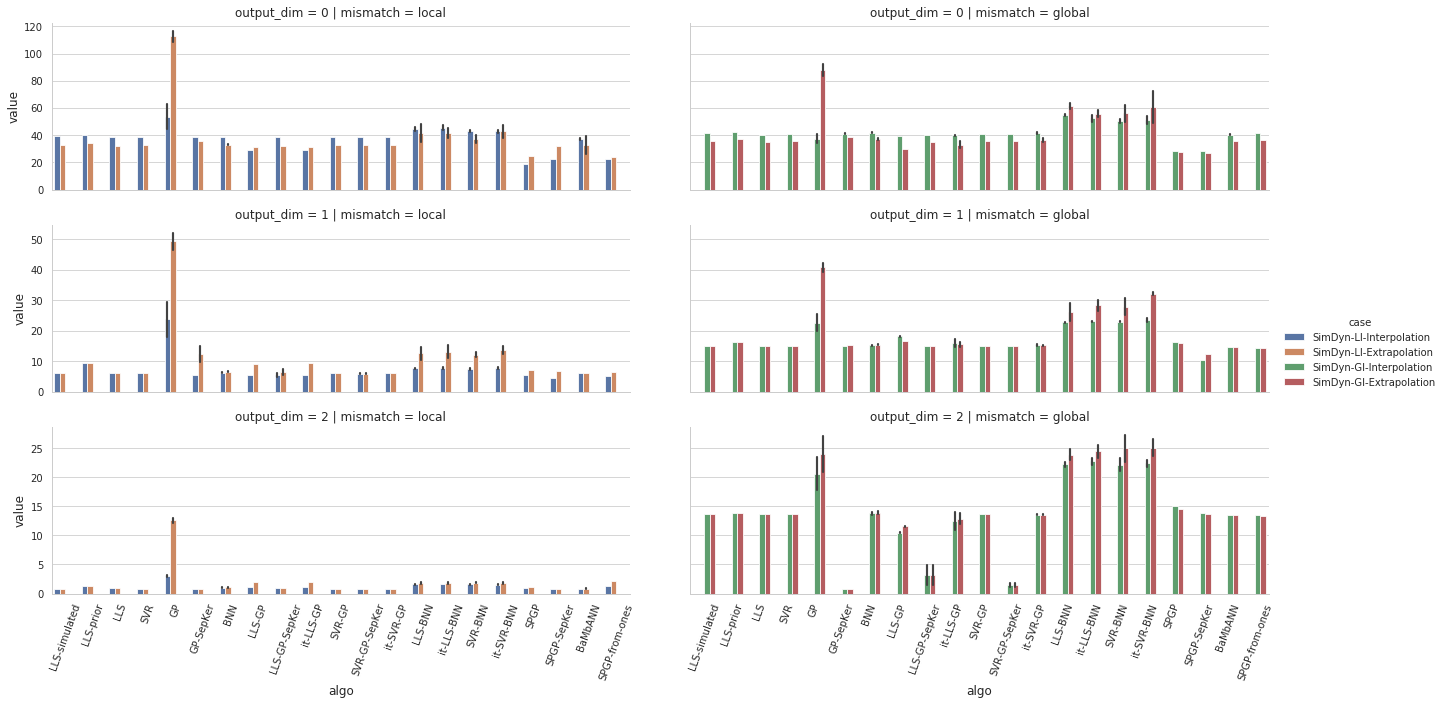

In [12]:
g = sns.catplot(x='algo', y='value', hue='case', row='output_dim', col='mismatch', data=df.groupby('metric').get_group('rmse'),
                height=3, aspect=3, ci='sd', kind='bar', sharey='row',
                order=full_algo_order)
print (type(g))
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(70)

algo  repetition  output_dim                     case mismatch  \
447  SPGP-from-ones           0           0  SimDyn-Ll-Extrapolation    local   
450  SPGP-from-ones           1           0  SimDyn-Ll-Extrapolation    local   
453  SPGP-from-ones           2           0  SimDyn-Ll-Extrapolation    local   
456  SPGP-from-ones           3           0  SimDyn-Ll-Extrapolation    local   
459  SPGP-from-ones           4           0  SimDyn-Ll-Extrapolation    local   
429            SPGP           4           0  SimDyn-Ll-Extrapolation    local   
417            SPGP           0           0  SimDyn-Ll-Extrapolation    local   
423            SPGP           2           0  SimDyn-Ll-Extrapolation    local   
420            SPGP           1           0  SimDyn-Ll-Extrapolation    local   
426            SPGP           3           0  SimDyn-Ll-Extrapolation    local   
312         BaMbANN           2           0  SimDyn-Ll-Extrapolation    local   
315         BaMbANN           3           0  SimDyn-Ll-Extrapolation    local   
384          LLS-GP           1           0  SimDyn-Ll-Extrapolation    local   
387          LLS-GP           2           0  SimDyn-Ll-Extrapolation    local   
390          LLS-GP           3           0  SimDyn-Ll-Extrapolation    local   

    metric      value  
447   rmse  23.994113  
450   rmse  23.996021  
453   rmse  23.996450  
456   rmse  23.996450  
459   rmse  23.996450  
429   rmse  24.759163  
417   rmse  24.759943  
423   rmse  24.759943  
420   rmse  24.759943  
426   rmse  24.766034  
312   rmse  25.018994  
315   rmse  25.980712  
384   rmse  31.220907  
387   rmse  31.220907  
390   rmse  31.220907

<class 'seaborn.axisgrid.FacetGrid'>


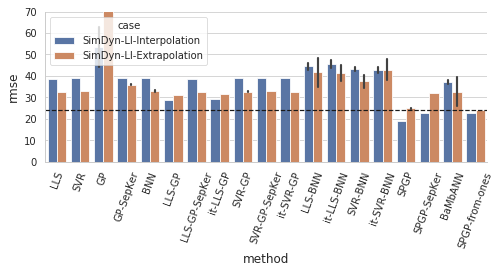

In [13]:
algo_groups = dict()
algo_groups['model-only'] = ['LLS', 'SVR']
algo_groups['model-free-only'] = ['GP', 'GP-SepKer', 'BNN']
algo_groups['sequential semi-parametric'] = ['LLS-GP', 'LLS-GP-SepKer', 'it-LLS-GP', 'SVR-GP', 'SVR-GP-SepKer', 'it-SVR-GP', 'LLS-BNN', 'it-LLS-BNN', 'SVR-BNN', 'it-SVR-BNN']
algo_groups['joint semi-parametric'] = ['SPGP', 'SPGP-SepKer', 'BaMbANN', 'SPGP-from-ones']

group_order = ['model-only', 'model-free-only', 'sequential semi-parametric', 'joint semi-parametric']

full_algo_order = []
for i, group in enumerate(group_order):
    for algo in algo_groups[group]:
        full_algo_order.append(algo)

dfplot = df.groupby(['metric','mismatch','output_dim']).get_group(('rmse','local',0))
display(dfplot.groupby('case').get_group('SimDyn-Ll-Extrapolation').sort_values(by='value').head(15))
g = sns.catplot(x='algo', y='value', hue='case', data=dfplot,
                height=3, aspect=2.5, ci='sd', kind='bar', sharey='row',
                order=full_algo_order, legend_out=False)
print (type(g))
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
    ax.set_ylim(0.0, 70.0)
    ax.set_ylabel('rmse')
    ax.set_xlabel('method')
    ax.axhline(y=23.994113, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)

plt.savefig('../images-src/bar_plot_simdyn_ll_rmse.svg', bbox_inches = "tight")

algo  repetition  output_dim                     case mismatch  \
1014  SPGP-SepKer           0           0  SimDyn-Gl-Extrapolation   global   
1017  SPGP-SepKer           1           0  SimDyn-Gl-Extrapolation   global   
1023  SPGP-SepKer           3           0  SimDyn-Gl-Extrapolation   global   
1026  SPGP-SepKer           4           0  SimDyn-Gl-Extrapolation   global   
1020  SPGP-SepKer           2           0  SimDyn-Gl-Extrapolation   global   
1005         SPGP           2           0  SimDyn-Gl-Extrapolation   global   
999          SPGP           0           0  SimDyn-Gl-Extrapolation   global   
1008         SPGP           3           0  SimDyn-Gl-Extrapolation   global   
1011         SPGP           4           0  SimDyn-Gl-Extrapolation   global   
1002         SPGP           1           0  SimDyn-Gl-Extrapolation   global   
963        LLS-GP           0           0  SimDyn-Gl-Extrapolation   global   
966        LLS-GP           1           0  SimDyn-Gl-Extrapolation   global   
969        LLS-GP           2           0  SimDyn-Gl-Extrapolation   global   
975        LLS-GP           4           0  SimDyn-Gl-Extrapolation   global   
972        LLS-GP           3           0  SimDyn-Gl-Extrapolation   global   

     metric      value  
1014   rmse  27.254801  
1017   rmse  27.254810  
1023   rmse  27.254817  
1026   rmse  27.254822  
1020   rmse  27.254843  
1005   rmse  27.505700  
999    rmse  27.534749  
1008   rmse  27.534749  
1011   rmse  27.534749  
1002   rmse  27.534749  
963    rmse  29.369003  
966    rmse  29.914093  
969    rmse  29.914093  
975    rmse  29.914093  
972    rmse  29.914093

<class 'seaborn.axisgrid.FacetGrid'>


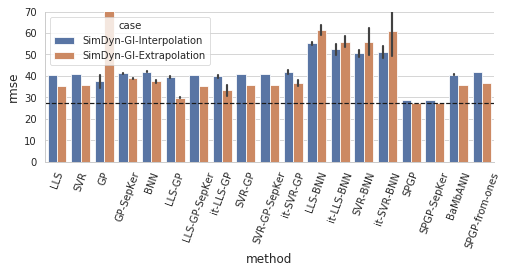

In [14]:
algo_groups = dict()
algo_groups['model-only'] = ['LLS', 'SVR']
algo_groups['model-free-only'] = ['GP', 'GP-SepKer', 'BNN']
algo_groups['sequential semi-parametric'] = ['LLS-GP', 'LLS-GP-SepKer', 'it-LLS-GP', 'SVR-GP', 'SVR-GP-SepKer', 'it-SVR-GP', 'LLS-BNN', 'it-LLS-BNN', 'SVR-BNN', 'it-SVR-BNN']
algo_groups['joint semi-parametric'] = ['SPGP', 'SPGP-SepKer', 'BaMbANN', 'SPGP-from-ones']

group_order = ['model-only', 'model-free-only', 'sequential semi-parametric', 'joint semi-parametric']

full_algo_order = []
for i, group in enumerate(group_order):
    for algo in algo_groups[group]:
        full_algo_order.append(algo)

dfplot = df.groupby(['metric','mismatch','output_dim']).get_group(('rmse','global',0))
display(dfplot.groupby('case').get_group('SimDyn-Gl-Extrapolation').sort_values(by='value').head(15))
g = sns.catplot(x='algo', y='value', hue='case', data=dfplot,
                height=3, aspect=2.5, ci='sd', kind='bar', sharey='row',
                order=full_algo_order, legend_out=False)
print (type(g))
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
    ax.set_ylim(0.0, 70.0)
    ax.set_ylabel('rmse')
    ax.set_xlabel('method')
    ax.axhline(y=27.254801, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)
        
plt.savefig('../images-src/bar_plot_simdyn_gl_rmse.svg', bbox_inches = "tight")